# Assessment Review

The topics covered will be:

1. Normal Distributions
2. Statistical Tests
3. Bayesian Statistics
4. Linear Regression

## Part 1: Normal Distributions

In this part, you will analyze hours of sleep for Freshman at a University. We know that the population distribution of hours of sleep for Freshman at the University is normally distributed with a mean of 6 and a standard deviation of 2.

### Task 1: Create a numeric variable `z_eight` that contains the z-score for a Freshman that sleeps 8 hours 

In [1]:
# Code here

from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


mu = 6
sigma = 2

z_eight = (8-mu)/sigma
z_eight


1.0

### Task 2: Create a numeric variable `over_eight` containing the approximate proportion of Freshman who get more than 8 hours of sleep

In [2]:
# Code here

over_eight = 1 - stats.norm(loc=mu, scale=sigma).cdf(8)
over_eight

0.15865525393145707

### Task 3: Calculate a 95% confidence interval for the amount of sleep for one Freshman who sleeps 7 times with a mean of 5 hours and a standard deviation of 0.5 hours

In [6]:
# Code here

alpha = .95
n = 7
s = .5
x_bar = 5

sterr = s / (n ** 0.5)
# Use that to get to the margin of error
margin_error = stats.t.ppf(0.975, df=n-1) * sterr  
# Using t because n=7, not enough to standardize

# Find our intervals
int_min = x_bar - margin_error
int_max = x_bar + margin_error


stats.t.interval(alpha,
                loc = x_bar,
                scale = sterr,
                df = n-1)

#stats.t.interval alpha is actually confidence level
# loc is mean
#scale is standard error
#degrees of freedom = n-1



(4.53757712628571, 5.46242287371429)

### Task 4: Interpret the 95% Confidence Interval that you derived in the above question

Interpret: 

- 95% of the true population mean will lie between 4.54 and 5.46.


## Part 2: Hypothesis Testing

Let's make some hypotheses about cars!

### Task 5: Set Up

In [9]:
# Imports - need pandas and matplotlib

import pandas as pd
import matplotlib.pyplot as plt


In [10]:
# Import the auto-mpg csv from the data folder
df = pd.read_csv("data/auto-mpg.csv")

In [12]:
# Check the head of our data
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [13]:
# Check the info on our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [14]:
# Describe the data
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


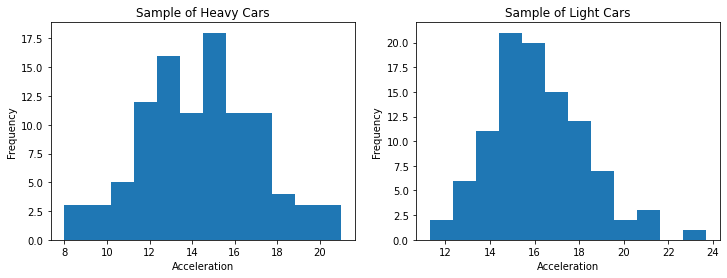

In [15]:
# Run this cell without changes to set up for the next set of questions

# Grabbing the median car weight
weight_median = df['weight'].median()

# Separating based on light cars and heavy cars
heavy_cars = df.loc[df['weight'] > weight_median].sample(n=100, random_state=42)
light_cars = df.loc[df['weight'] <= weight_median].sample(n=100, random_state=42)

# Plotting histograms for acceleration for both light and heavy cars
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Heavy Cars')
ax1.set_xlabel('Acceleration')
ax1.set_ylabel('Frequency')
ax1.hist(heavy_cars['acceleration'], bins=12)

ax2.set_title('Sample of Light Cars')
ax2.set_xlabel('Acceleration')
ax2.set_ylabel('Frequency')
ax2.hist(light_cars['acceleration'], bins=12)
plt.show()

### The Prompt: 

> Car manufacturers want to know if light cars accelerate faster than heavy cars.

### Task 6: Set up the null and alternative hypotheses for this test

**Null hypothesis:**

- Light cars will accelerate equal to or less than heavy cars.


**Alternative hypothesis:**

- Light cars will accelerate faster than heavy cars.


### Task 7: Describe your Type 1 and Type 2 errors in this context

**Type I Error:**

- False Positive: I rejected the null hypothesis, stating that on average light cars will accelerate faster than heavy cars, when I should have failed to reject the null.


**Type II Error:**

- False Negative: I failed to reject the null, stating that on average light cars will accelerate at a rate equal to or less than heavy cars, when I should have rejected the null.



### Task 8: The Hypothesis Test!

### 8a: Describe the type of test:

Description:

- two-sample independent t test


### 8b: Run the test, using alpha = .05 and assuming that the samples have equal variance

In [16]:
# Code here
print(stats.ttest_ind(light_cars['acceleration'], heavy_cars['acceleration']))

Ttest_indResult(statistic=5.00874014469676, pvalue=1.2096440668168987e-06)


### 8c: Analyze your results: can you reject the null hypothesis?

Can you reject the null hypothesis?

- yes, p value is smaller than alpha


## Part 3: Bayesian Statistics

$$ P(A|B) = \dfrac{P(B|A)P(A)}{P(B)}$$

### The Prompt: 
> In the second session of the 98th congress in 1984, a congressman voted 'No' on providing aid to El Salvador. 
> 
> Given that 60% of the congress were Democrats, 75% of whom voted 'No' for providing aid to El Salvador, and only 5% of Republicans voted 'No' to the proposal, what is the conditional probability that this individual is a Democrat?

### Task 9: Calculate the probability

**1. Which probability are we trying to find?**

   - the probability that the congressman was a democrat, give that they voted no
   P(Democrat | No)
   
    
**2. Based on that, what other pieces do we need?**

   - 
    
    
**3. Result?**

   - 
    

## Part 4: Simple Linear Regression

**BACK TO CARS**

### The Prompt:

> Car manufacturers have asked us to predict how many miles per gallon a car can run based on the other variables we have in the data we're given. 

Sounds like a regression problem! But first let's further explore the data.

### Task 10: Explore the Data Visually

In [ ]:
import seaborn as sns

In [ ]:
# Make a pairplot using seaborn to examine the relationships between variables
# Note - do this on the whole dataframe, not just independent variables


In [ ]:
# Create a correlation heatmap as well, with seaborn plus the 'corr' function


### Task 11: Explore your variables

Look at both at the pairplot and the correlation heatmap - what are some trends you see? Any potential problems?

Here, we expect you to look at what kinds of data you have. You may also want to discuss how the data is distributed. Analyze both the relationships between independent variables and the relationships between independent variables and your target/dependent variable (miles per gallon).

**Observations:**

- 


### Task 12: Pick one X variable and model

Pick the variable you think would be best to use to predict MPG, and create, fit and summarize the output of a statsmodels OLS model!

Set the summary output equal to `simple_model_summary`

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
# Either define X and y (if using OLS) or define your formula (if using ols)
# Make sure that if you use OLS to add a constant to your X!



In [ ]:
simple_model_summary = None

### Task 13: Interpret!

There are many things you could observe from this output, but I want especially for you to make an inference about the relationship between the X variable and MPG.

- 


### Task 14: Model with all numeric X variables

Create, fit and summarize the output of a statsmodels OLS model that has all of the possible X variables in our dataset!

Set the summary output equal to `model_summary`

In [ ]:
# Want to use 'cylinders', 'displacement', 'horsepower', 'weight' and 'acceleration'
df.head()

In [ ]:
# Either define X and y (if using OLS) or define your formula (if using ols)
# Make sure that if you use OLS to add a constant to your X! 


In [ ]:
model_summary = None

### Task 15: Interpret!


Specifically, compare this model summary to your simple model's summary.

- 
